# Load Dataset 

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np 


In [3]:
dataset = pd.read_csv("Malware_Dataset.csv")

In [4]:
dataset.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


# Process Dataset 

In [5]:
df = dataset.drop(['Category'], axis=1)
df['Class'] = df['Class'].replace(['Malware', 'Benign'], [1, 0]) 

In [6]:
malware_samples_indices = df[df['Class'] == 1].index
num_rows_to_delete = int(0.8 * len(malware_samples_indices))
rows_to_delete = np.random.choice(malware_samples_indices, size=num_rows_to_delete, replace=False)


In [7]:
df = df.drop(rows_to_delete)

In [8]:
print(df['Class'].value_counts())

0    29298
1     5860
Name: Class, dtype: int64


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42)

# Train and Evaluate Models

In [11]:
## Isolation Forest
Isolation_Forest_model=IsolationForest(max_samples= 100, n_estimators= 200, contamination=0.2, bootstrap = True)
Isolation_Forest_model.fit(Xtrain)

IsolationForest(bootstrap=True, contamination=0.2, max_samples=100,
                n_estimators=200)

In [12]:
predictions = Isolation_Forest_model.predict(Xtest)
print(predictions)

[ 1  1  1 ...  1  1 -1]


In [13]:
print(pd.value_counts(predictions))

 1    5691
-1    1341
dtype: int64


In [14]:
predictions[predictions== 1] = 0
predictions[predictions== -1] = 1

In [15]:
print(pd.value_counts(predictions))

0    5691
1    1341
dtype: int64


In [16]:
Isolation_forest_classification_report = classification_report(predictions, ytest)
print(Isolation_forest_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      5691
           1       0.31      0.27      0.29      1341

    accuracy                           0.74      7032
   macro avg       0.57      0.56      0.56      7032
weighted avg       0.73      0.74      0.74      7032



In [17]:
cm_isolation_forest = confusion_matrix(predictions, ytest)

In [19]:
print(cm_isolation_forest)

[[4880  811]
 [ 983  358]]


<Axes: >

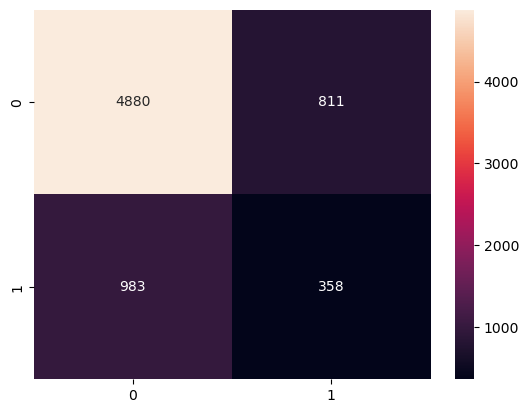

In [21]:
import seaborn as sns
sns.heatmap(cm_isolation_forest, fmt='2', annot=True)

In [23]:
## local Outlier Factor 
Local_outlier_factor = LocalOutlierFactor(n_neighbors = 100, algorithm='auto', contamination=0.2, novelty=True)
Local_outlier_factor.fit(Xtrain)

LocalOutlierFactor(contamination=0.2, n_neighbors=100, novelty=True)

In [24]:
LOF_predictions = Local_outlier_factor.predict(Xtest)

In [25]:
LOF_predictions[LOF_predictions== 1] = 0
LOF_predictions[LOF_predictions== -1] = 1

print(pd.value_counts(LOF_predictions))

0    5622
1    1410
dtype: int64


In [26]:
LOF_classification_report = classification_report(LOF_predictions, ytest)
print(LOF_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      5622
           1       0.18      0.15      0.16      1410

    accuracy                           0.69      7032
   macro avg       0.49      0.49      0.49      7032
weighted avg       0.67      0.69      0.68      7032



<Axes: >

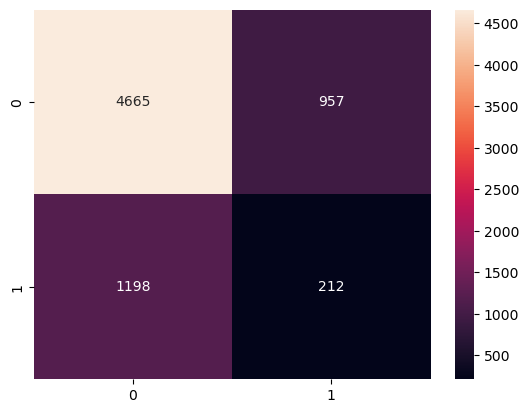

In [28]:
confusion_matrix_LOF = confusion_matrix(LOF_predictions, ytest)
sns.heatmap(confusion_matrix_LOF, fmt='2', annot=True)

In [38]:
## One Class SVM 
## train and test
one_class_svm = OneClassSVM()
one_class_svm.fit(Xtrain)

OneClassSVM()

In [30]:
one_class_svm_predictions=one_class_svm.predict(Xtest)

In [31]:
one_class_svm_predictions[one_class_svm_predictions== 1] = 0
one_class_svm_predictions[one_class_svm_predictions== -1] = 1

print(pd.value_counts(one_class_svm_predictions))

0    3579
1    3453
dtype: int64


In [32]:
SVM_classification_report = classification_report(one_class_svm_predictions, ytest)
print(SVM_classification_report)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      3579
           1       1.00      0.34      0.50      3453

    accuracy                           0.67      7032
   macro avg       0.80      0.67      0.63      7032
weighted avg       0.80      0.67      0.63      7032



<Axes: >

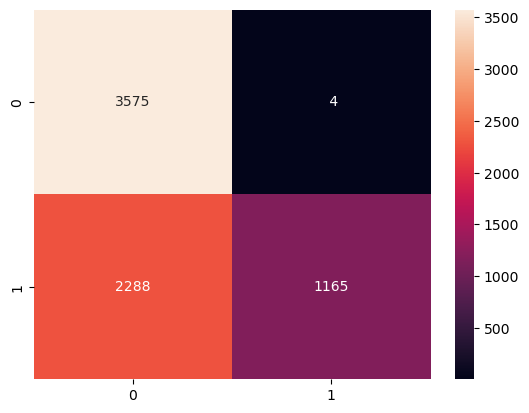

In [35]:
SVM_confusion_matrix = confusion_matrix(one_class_svm_predictions, ytest)
sns.heatmap(SVM_confusion_matrix, fmt='2', annot=True)